<a href="https://colab.research.google.com/github/marcusamartin/FacebookPostPopularity/blob/master/ColabCS170MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Popularity of a Facebook Post using Comments

Problem motivation:
We want to predict whether or not a Facebook post will receive a minimum number of comments.
Facebook is a social media platform where users can connect with others by posting  messages, photos, and videos. Other users can leave comments attached to these posts. If a user’s post is sponsored by a company, that company would want to have an idea of how many people will react.


We are using a dataset of Facebook comments provided by UCI with over 40,000 entries and 54 features from 2016:
http://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset?fbclid=IwAR0-0E-gKKpGAe0wRZ2AHboKgntIO3UrAVPaFOnkw6R6IAuAgHVgDzde1qo


We chose to do binary classification with DecisionTree, Random Forest, and KNN. Our binary classification tells us whether or not the post has more than 50 comments.

## Import Libraries

First we import the libraries needed for the project.


*   matplotlib.plyplot: needed to plot the data
*   seaborn: needed to generate the confusion matrix
*   numpy: needed for performing operations on the data
*   pandas: needed for data manipulation and analysis



In [ ]:
import matplotlib.pyplot as plt   # needed to plot data
import seaborn as sns; sns.set()   # needed to generate confusion matrix
import numpy as np   # needed for performing operations on data
import pandas as pd   # needed for data manipulation and analysis

## Helper Functions

We also define some functions that will help us understand the performance of our model.


*   plot_PR_curve: plots a precision-recall curve
*   plot_RC_curve: plots an AUC-ROC curve
*   print_metrics: prints precision, recall, F1, and AUC metrics



In [ ]:
# resource: https://github.com/rutujagurav/Binary-Classification-Predicting-a-pulsar-star/blob/master/PulsarStar_v1.ipynb

from sklearn import metrics

# plots PR curve
def plot_PR_curve(y_test, y_pred):
    y_score = y_pred
    precision_curve, recall_curve, pr_thresholds = metrics.precision_recall_curve(y_test, y_pred)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_pred)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_pred >= value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set(ylim=(0, 1))

    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax1.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    
    #filename = "Pipelevel_Predictions_RF\\"
    #plt.savefig(filename + str(year)+'_precision_recall.png', bbox_inches='tight')
    #plt.close()
    plt.tight_layout()
    plt.show()

# plots ROC curve
def plot_ROC_curve(y_test, y_pred):
    fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred)
    roc_auc = metrics.auc(fpr,tpr)
    plt.clf()
    plt.title("ROC")
    plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.tight_layout()
    plt.show()
    
# prints Precision, Recall, F1, and AUC metrics
def print_metrics(y_test, y_pred, k, threshold = 0.5):
    print("Precision", metrics.precision_score(y_test, y_pred > threshold))
    print("Recall",metrics.recall_score(y_test, y_pred > threshold))
    print("F1",metrics.f1_score(y_test, y_pred > threshold))
    print("AUC",metrics.roc_auc_score(y_test, y_pred))

## Import .CSV Files

We start by reading the .csv file that contains the dataset into a Pandas DataFrame. In our case, we have five .csv files. Since we want as much data as possible to train our model, we read all the .csv files into their own DataFrame. This is done by accessing the Google Drive that contains the files and then getting the path to each of the files.

In your Google Drive, create a folder named "CS170MLProject" and put the unzipped Dataset folder obtained from the UCI website (http://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset) into the folder. You will need to allow Google Colab access to your Google Drive.

In [ ]:
# resource: https://medium.com/@simonprdhm/2-ways-to-upload-csv-files-to-google-colab-4d29ffa9db85

# import the google drive where the csv files are located
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# get the path to the csv files
path = "/content/gdrive/My Drive/CS170 Project 2 Machine Learning/Dataset/Dataset/Training/Features_Variant_1.csv"
path2 = "/content/gdrive/My Drive/CS170 Project 2 Machine Learning/Dataset/Dataset/Training/Features_Variant_2.csv"
path3 = "/content/gdrive/My Drive/CS170 Project 2 Machine Learning/Dataset/Dataset/Training/Features_Variant_3.csv"
path4 = "/content/gdrive/My Drive/CS170 Project 2 Machine Learning/Dataset/Dataset/Training/Features_Variant_4.csv"
path5 = "/content/gdrive/My Drive/CS170 Project 2 Machine Learning/Dataset/Dataset/Training/Features_Variant_5.csv"

# store the csv's
dataset = pd.read_csv(path, engine='python')
dataset2 = pd.read_csv(path2, engine='python')
dataset3 = pd.read_csv(path3, engine='python')
dataset4 = pd.read_csv(path4, engine='python')
dataset5 = pd.read_csv(path5, engine='python')

Mounted at /content/gdrive


## Add Header to CSV Columns

Since there are no descriptions for any of the columns, we want to add headers to each column that describe the contents of the column. This is done by adding the same column headers to each DataFrame.

In [ ]:
# resource: https://kite.com/python/answers/how-to-add-a-header-to-a-csv-file-in-python#:~:text=Use%20pandas.,header%20to%20a%20CSV%20file&text=read_csv(file%2C%20header%3DNone,header%20to%20the%20CSV%20file.

# define header for each column in dataset
addHeader = ["Page Popularity/likes", "Page Check-ins", "Page Talking About", "Page Category", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "Comments Before Selected Date/Time", "Comments in Last 24 Hours Relative to Base Date/Time", "Comments in Last 48-24 Hours Relative to Base Date/Time", "Comments in First 24 Hours Before Base Date/Time", "Difference between Comments in Last 24 and 48-24 Hours", "Selected Time", "Post Length", "Post Share Count", "Post Promotion Status", "H Hrs Local", "40", "41", "42", "43", "44", "45", "46", "47", "48", "49", "50", "51", "52", "53", "Number Of Predicted Comments"]

# add column headers to datasets
dataset.to_csv(path, header=addHeader, index=False)
dataset2.to_csv(path2, header=addHeader, index=False)
dataset3.to_csv(path3, header=addHeader, index=False)
dataset4.to_csv(path4, header=addHeader, index=False)
dataset5.to_csv(path5, header=addHeader, index=False)

## Combine CSV's into a Single Dataset

To make the data easier to manipulate and analyze, we combine the five DataFrames into a single DataFrame.

In [ ]:
# resource: https://stackoverflow.com/questions/48051100/python-pandas-merge-multiple-csv-files

dataset = pd.concat([dataset, dataset2, dataset3, dataset4, dataset5])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444727 entries, 0 to 40947
Data columns (total 54 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   Page Popularity/likes                                    444727 non-null  int64  
 1   Page Check-ins                                           444727 non-null  int64  
 2   Page Talking About                                       444727 non-null  int64  
 3   Page Category                                            444727 non-null  int64  
 4   5                                                        444727 non-null  float64
 5   6                                                        444727 non-null  float64
 6   7                                                        444727 non-null  float64
 7   8                                                        444727 non-null  float64
 8   9              

##Binary Classification
The target values from our dataset range from being 0-2000, with the majority of target values being 0 (67%~) or under 5 (80%). We found out these percentages by running the describe() function with different percentile values. 

We decided to model our dataset in a binary fashion based on if a post has received more than 50 comments. Posts with 0-50 comments receive a target value of 0 and posts with more than 50 comments are given a target value of 1.

In [ ]:
dataset.describe(percentiles=[.60, .65, .70, .75, .80, .85, .90, .95])

,Page Popularity/likes,Page Check-ins,Page Talking About,Page Category,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,Comments Before Selected Date/Time,Comments in Last 24 Hours Relative to Base Date/Time,Comments in Last 48-24 Hours Relative to Base Date/Time,Comments in First 24 Hours Before Base Date/Time,Difference between Comments in Last 24 and 48-24 Hours,Selected Time,Post Length,Post Share Count,Post Promotion Status,H Hrs Local,40,41,42,43,44,45,46,47,48,49,50,51,52,53,Number Of Predicted Comments
count,4.447270e+05,444727.000000,4.447270e+05,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.0,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000
mean,1.313598e+06,4672.938200,4.476669e+04,24.250441,0.813245,471.000277,55.832195,35.417272,67.869807,0.116728,344.361950,21.873075,7.229914,40.702483,0.006100,336.997228,19.937745,4.901717,40.081050,0.792743,429.322506,52.687524,33.791902,63.349827,-285.884673,337.775022,1.935330,-2.157497,56.524121,55.832340,21.873136,19.937789,52.687647,1.935347,35.445089,163.635835,117.270804,0.0,23.773160,0.122322,0.143223,0.149750,0.157303,0.144226,0.146243,0.136933,0.140500,0.133318,0.138150,0.146690,0.154160,0.144756,0.142427,7.175285
std,6.816461e+06,20578.599733,1.110092e+05,19.944907,13.961850,525.478066,86.528025,68.915809,82.560976,5.812971,416.755833,36.058074,19.929172,52.571634,0.904842,403.453228,31.154825,13.201298,52.004716,13.367045,486.050087,80.998014,65.196071,77.017957,356.472726,416.193642,13.457663,12.587571,74.280711,137.512966,75.635196,72.674729,128.474525,94.306651,20.954635,375.881766,949.360608,0.0,1.877816,0.327658,0.350300,0.356827,0.364087,0.351319,0.353350,0.343777,0.347505,0.339918,0.345058,0.353797,0.361102,0.351855,0.349488,34.631773
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2011.000000,-204.000000,-584.666667,-1411.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2011.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,246.000000,23.729765,12.000000,33.233348,0.000000,159.000000,8.759322,2.000000,18.670111,0.000000,152.000000,8.133663,1.000000,18.933186,0.000000,231.000000,21.680070,12.000000,31.079673,-128.000000,151.000000,0.219626,0.000000,25.481725,11.000000,2.000000,0.000000,10.000000,0.000000,35.000000,97.000000,13.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60%,4.564780e+05,0.000000,1.930100e+04,24.000000,0.000000,411.000000,34.434829,19.000000,52.131238,0.000000,278.000000,12.606061,3.500000,30.302196,0.000000,282.000000,12.248162,2.000000,30.515248,0.000000,363.000000,32.263889,19.000000,47.193977,-80.000000,262.000000,0.589655,0.000000,40.705810,19.000000,4.000000,2.000000,18.000000,0.000000,42.000000,122.000000,23.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
65%,6.330160e+05,1.000000,2.798900e+04,24.000000,0.000000,503.000000,41.732558

From this we can see the mean value of comments from our 444727 training samples is 7.175. Standard deviation is 34.63
67-68% with 0 predicted comment, 80 percentile is 4,  about 92-93% under 50.
Due to the majority of values being zero, we want to also test a binary classification of whether the post receives a comment or not.

In [ ]:
#resource: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
   #example : df.loc[df['shield'] > 35] = 0   Set value for rows matching callable condition
#resource: https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
   #Added "[... , 'Number Of Predicted Comments']" to specify to only change the entry in that collumn

biData = dataset.copy()

biData.loc[biData[ 'Number Of Predicted Comments'] < 50, 'Number Of Predicted Comments'] = 0
biData.loc[biData[ 'Number Of Predicted Comments'] >= 50, 'Number Of Predicted Comments'] = 1

biData.describe(percentiles=[.20, .40, .60, .80])

,Page Popularity/likes,Page Check-ins,Page Talking About,Page Category,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,Comments Before Selected Date/Time,Comments in Last 24 Hours Relative to Base Date/Time,Comments in Last 48-24 Hours Relative to Base Date/Time,Comments in First 24 Hours Before Base Date/Time,Difference between Comments in Last 24 and 48-24 Hours,Selected Time,Post Length,Post Share Count,Post Promotion Status,H Hrs Local,40,41,42,43,44,45,46,47,48,49,50,51,52,53,Number Of Predicted Comments
count,4.447270e+05,444727.000000,4.447270e+05,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.0,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000
mean,1.313598e+06,4672.938200,4.476669e+04,24.250441,0.813245,471.000277,55.832195,35.417272,67.869807,0.116728,344.361950,21.873075,7.229914,40.702483,0.006100,336.997228,19.937745,4.901717,40.081050,0.792743,429.322506,52.687524,33.791902,63.349827,-285.884673,337.775022,1.935330,-2.157497,56.524121,55.832340,21.873136,19.937789,52.687647,1.935347,35.445089,163.635835,117.270804,0.0,23.773160,0.122322,0.143223,0.149750,0.157303,0.144226,0.146243,0.136933,0.140500,0.133318,0.138150,0.146690,0.154160,0.144756,0.142427,0.031226
std,6.816461e+06,20578.599733,1.110092e+05,19.944907,13.961850,525.478066,86.528025,68.915809,82.560976,5.812971,416.755833,36.058074,19.929172,52.571634,0.904842,403.453228,31.154825,13.201298,52.004716,13.367045,486.050087,80.998014,65.196071,77.017957,356.472726,416.193642,13.457663,12.587571,74.280711,137.512966,75.635196,72.674729,128.474525,94.306651,20.954635,375.881766,949.360608,0.0,1.877816,0.327658,0.350300,0.356827,0.364087,0.351319,0.353350,0.343777,0.347505,0.339918,0.345058,0.353797,0.361102,0.351855,0.349488,0.173928
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2011.000000,-204.000000,-584.666667,-1411.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2011.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,2.398500e+04,0.000000,4.420000e+02,9.000000,0.000000,38.000000,3.955056,2.000000,5.652212,0.000000,24.000000,1.439560,0.000000,3.242442,0.000000,24.000000,1.384615,0.000000,3.274958,0.000000,34.000000,3.605381,1.000000,5.349683,-531.000000,23.000000,-0.431579,-4.000000,4.664967,1.000000,0.000000,0.000000,1.000000,-10.000000,14.000000,26.000000,1.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40%,1.491390e+05,0.000000,2.773000e+03,16.000000,0.000000,154.000000,13.314488,7.000000,20.181735,0.000000,99.000000,5.223684,1.000000,11.078193,0.000000,96.000000,4.746988,0.500000,10.681144,0.000000,135.000000,12.375000,6.000000,18.824887,-221.000000,96.000000,0.054054,-1.000000,15.739369,6.000000,1.000000,0.000000,6.000000,-1.000000,28.000000,74.000000,4.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,246.000000,23.729765,12.000000,33.233348,0.

First we make a copy of the unaltered dataset. Then, we locate values in the column of the dataframe labeled 'Number Of Predicted Comments' that are < 50 and >= 50. The target values in this column become all ones and zeros.

In [ ]:

#biData['Number Of Predicted Comments'].astype(bool).sum(axis=0) #was 198750

numOnes = np.count_nonzero(biData['Number Of Predicted Comments'])
numZeros= len(biData['Number Of Predicted Comments']) - numOnes
print('Number of Zeros: ',numZeros)
print('Number of Ones: ', numOnes)
print('Sum of numZeros and numOnes: ',numZeros+numOnes)
print('Number of entries in column: ', len(dataset['Number Of Predicted Comments'])) 

Number of Zeros:  430840
Number of Ones:  13887
Sum of numZeros and numOnes:  444727
Number of entries in column:  444727


As shown by the above results, we see that the binary transformation was successful in turning all target values to 0s and 1s.
We make sure that the length of the 'Number Of Predicted Comments' column in the original dataset is the same as the sum of our count of 0s and 1s. 

### Feature Selection with Decision Tree

Since we see that we have 53 attributes based on the number of columns, we want to determine which features will be the most useful to the model. Feature selection allows us to reduce the amount of data and processing for the model. It can also improve the performance of the model.

SKLearn's Decision Tree Classifier calculates the feature importances by doing feature selection algorithm based on Gini Importance. Gini Importance calculates each feature importance as the sum over the number of splits that include the feature, proportionally to the total splits.

We will use the Decision Tree Classifier to perform feature selection on the dataset. We will explain the need for having a train and test set from the dataset later on.

In [ ]:
# resource: https://datascience.stackexchange.com/questions/23954/is-there-a-model-agnostic-way-to-determine-feature-importance

from sklearn.model_selection import train_test_split

# train_Test_split: x = independent features, y = dependent variable (training and test sets) 20% dataset for test, 42 for  random num seed
xTrain, xTest, yTrain, yTest = train_test_split(biData.drop(['Number Of Predicted Comments'], axis=1),biData['Number Of Predicted Comments'], test_size=0.20, random_state=42)

###Decision Tree

Here we use the Decision Tree Classifier on the dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(xTrain, yTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

####Features Importances

Now we use the Decision Tree Classifier to find the features importances for the feature selection.

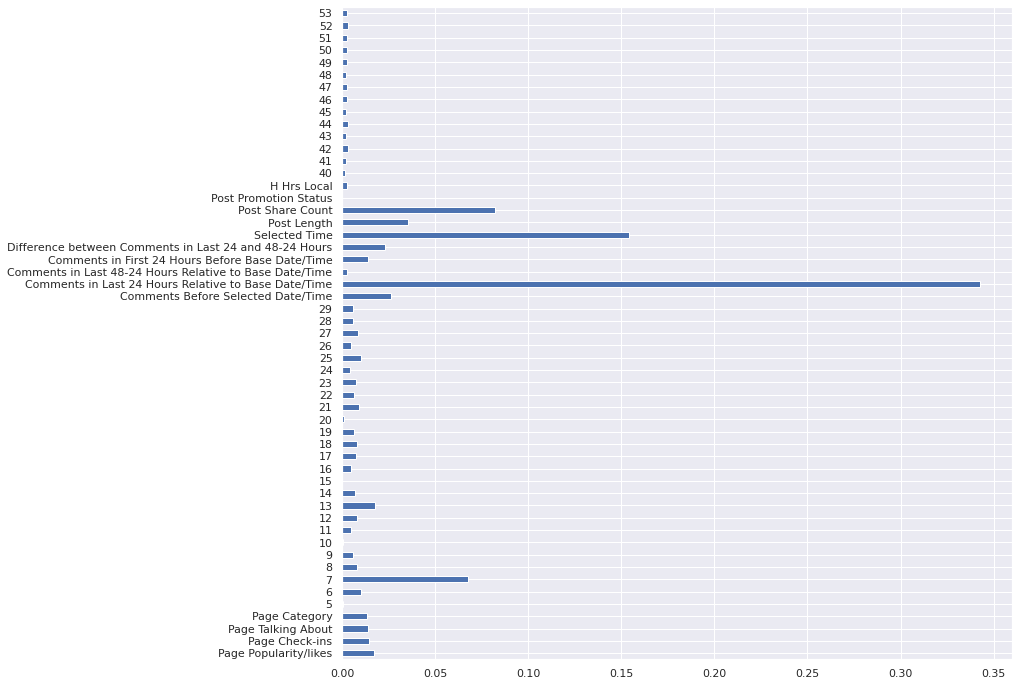

In [ ]:
# remove the target column from the decision tree classifier
cols = list(biData.columns)
cols.remove('Number Of Predicted Comments')

feat_importances = pd.Series(clf_dt.feature_importances_, index=cols)
feat_importances.plot(kind='barh', figsize=(12,12))
plt.show()


####Remove Unnecessary Columns

After finding the feature importances of the dataset, we see that that several columns have no feature importance value. We will remove these columns from the dataset.

In [ ]:
#excluded features for values zero or close to zero
excludedFeats = ['5', '10', '15', '20', 'Post Promotion Status', 'H Hrs Local']

#the errors = 'ignore' is to stop the error raise in future runs after the features have already been dropped
biData = biData.drop( excludedFeats ,axis=1, errors = 'ignore')

#Shows our remaining features after feature selection
biData.describe()

,Page Popularity/likes,Page Check-ins,Page Talking About,Page Category,6,7,8,9,11,12,13,14,16,17,18,19,21,22,23,24,25,26,27,28,29,Comments Before Selected Date/Time,Comments in Last 24 Hours Relative to Base Date/Time,Comments in Last 48-24 Hours Relative to Base Date/Time,Comments in First 24 Hours Before Base Date/Time,Difference between Comments in Last 24 and 48-24 Hours,Selected Time,Post Length,Post Share Count,40,41,42,43,44,45,46,47,48,49,50,51,52,53,Number Of Predicted Comments
count,4.447270e+05,444727.000000,4.447270e+05,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000,444727.000000
mean,1.313598e+06,4672.938200,4.476669e+04,24.250441,471.000277,55.832195,35.417272,67.869807,344.361950,21.873075,7.229914,40.702483,336.997228,19.937745,4.901717,40.081050,429.322506,52.687524,33.791902,63.349827,-285.884673,337.775022,1.935330,-2.157497,56.524121,55.832340,21.873136,19.937789,52.687647,1.935347,35.445089,163.635835,117.270804,0.122322,0.143223,0.149750,0.157303,0.144226,0.146243,0.136933,0.140500,0.133318,0.138150,0.146690,0.154160,0.144756,0.142427,0.031226
std,6.816461e+06,20578.599733,1.110092e+05,19.944907,525.478066,86.528025,68.915809,82.560976,416.755833,36.058074,19.929172,52.571634,403.453228,31.154825,13.201298,52.004716,486.050087,80.998014,65.196071,77.017957,356.472726,416.193642,13.457663,12.587571,74.280711,137.512966,75.635196,72.674729,128.474525,94.306651,20.954635,375.881766,949.360608,0.327658,0.350300,0.356827,0.364087,0.351319,0.353350,0.343777,0.347505,0.339918,0.345058,0.353797,0.361102,0.351855,0.349488,0.173928
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2011.000000,-204.000000,-584.666667,-1411.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2011.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,47.000000,5.419108,2.000000,8.024092,36.000000,2.042038,0.000000,4.580995,34.000000,1.950000,0.000000,4.354126,43.000000,5.093023,2.000000,7.554663,-402.500000,35.000000,-0.191489,-2.500000,6.511164,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,38.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,246.000000,23.729765,12.000000,33.233348,159.000000,8.759322,2.000000,18.670111,152.000000,8.133663,1.000000,18.933186,231.000000,21.680070,12.000000,31.079673,-128.000000,151.000000,0.219626,0.000000,25.481725,11.000000,2.000000,0.000000,10.000000,0.000000,35.000000,97.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,753.000000,71.741379,41.000000,102.554954,505.000000,27.655926,7.500000,59.479737,502.000000,26.270270,5.000000,58.744958,682.000000,68.485452,39.000000,95.493038,-29.000000,490.000000,1.886139,0.000000,81.559672,46.000000,11.000000,9.000000,44.000000,3.000000,53.000000,172.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

## Split Data into Train and Test Sets

Now that we have performed feature selection on the dataset, we now split the dataset into a train and test set. The majority of data goes to the training set to help us avoid overfitting. We chose 20% for testing and 80% for training.

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(biData.drop(['Number Of Predicted Comments'], axis=1),biData['Number Of Predicted Comments'], test_size=0.20, random_state=42)

# The collections counter display the count of each value with the dataset. 
#For our binary target values in y, the counter will show only 0s and 1s
import collections
print(collections.Counter(yTrain))
print(collections.Counter(yTest))

Counter({0: 344642, 1: 11139})
Counter({0: 86198, 1: 2748})


##Oversampling

The number of 1 target values in our dataset is only around 8%. In order to train our dataset with a more balanced sample, we used oversampling to create more instances where the target value is 1. After implementing the code below, we have equal instances of 0s and 1s from our counter.

In [ ]:
# resource: https://stats.stackexchange.com/questions/321970/imbalanced-data-smote-and-feature-selection#:~:text=1%20Answer&text=This%20paper%20argues%20that%20feature,preferred%2C%20and%20at%20a%20minimum%3A&text=performing%20variable%20selection%20after%20using,that%20the%20samples%20are%20independent.

from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTEENN

sm = SMOTE(random_state=10)
xTrainSM, yTrainSM = sm.fit_sample(xTrain, yTrain)

import collections
print(collections.Counter(yTrainSM))#Notice change in output from yTrain before
print(collections.Counter(yTest))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 344642, 1: 344642})
Counter({0: 86198, 1: 2748})


SMOTE stands for Synthetic Minority Oversampling Technique. 

"… SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b." - Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

## Machine Learning Classifications

Now it is time to train and test our data after doing feature selection. Machine learning classifiers allow us to assign class labels to data points from the dataset. We will use the Decision Tree Classifier, Random Forest Classifier, and the K-Nearest Neighbors Classifer on the dataset.

### Decision Tree

A decision tree classifier breaks down a data set into smaller subsets while an associated decision tree is incrementally built. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf nodes represents a classification. Our best predictor becomes the root node
Here we use the Decision Tree Classifier on the dataset.

In [ ]:
# retrain, The target value ,Number of Predicted Comments, array is Y. Our features from our dataset are X

#xTrain, xTest, yTrain, yTest = train_test_split(biData.drop(['Number Of Predicted Comments'], axis=1),biData['Number Of Predicted Comments'], test_size=0.20, random_state=42)
clfDT = DecisionTreeClassifier()
clfDT.fit(xTrainSM, yTrainSM)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

####Feature Importances

Now we use the Decision Tree Classifier to find the feature importances for the feature selection.

47


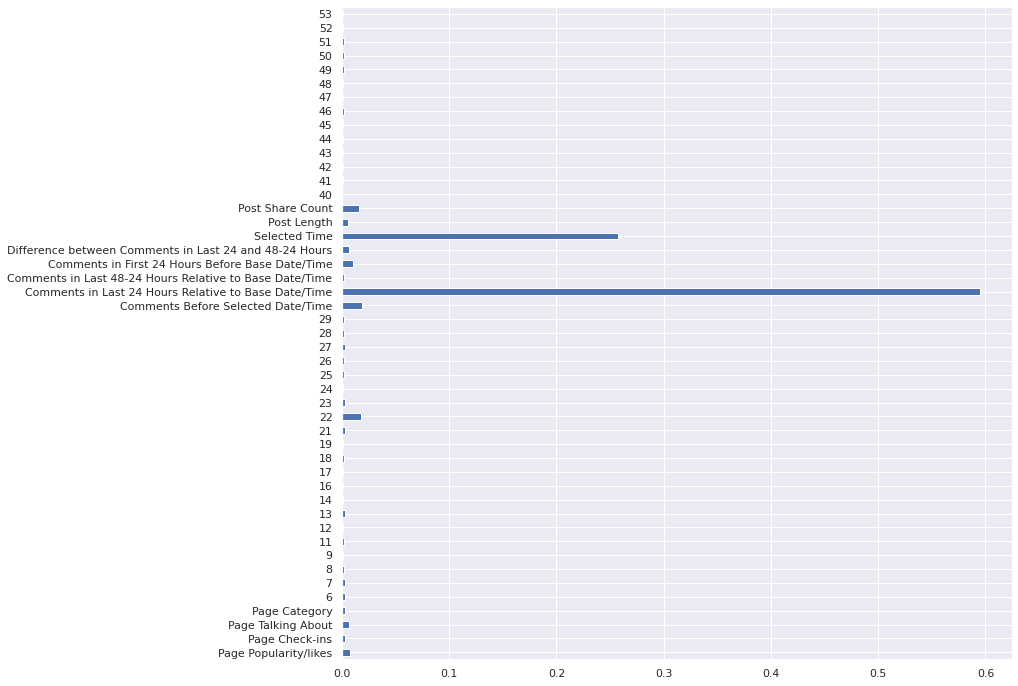

In [ ]:
# resource: https://towardsdatascience.com/explain-your-machine-learning-with-feature-importance-774cd72abe

cols = list(biData.columns)
cols.remove('Number Of Predicted Comments')
print(len(cols))
featImportances = pd.Series(clfDT.feature_importances_, index=cols)
featImportances.plot(kind='barh', figsize=(12,12))
plt.show()

Based on the bar graph shown above, we can see the level of contribution a feature has on the predictions of the model.

####Evaluation

Now we view the accuracy, precision, recall, F1, and AUC of the model from using the Decision Tree Classifier. We also plot the precision-recall and AUC-ROC curves.

Accuracy:  0.9832032918849639
Precision 0.7021276595744681
Recall 0.7925764192139738
F1 0.7446153846153846
AUC 0.8909284564804643


<Figure size 432x288 with 0 Axes>

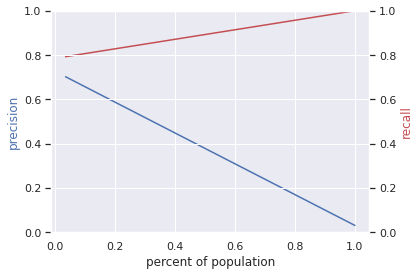

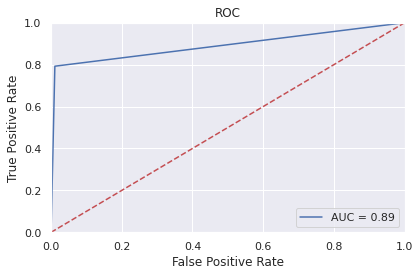

In [ ]:
# resource: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/#:~:text=Accuracy%20%2D%20Accuracy%20is%20the%20most,observation%20to%20the%20total%20observations.&text=80%25%20accurate.,the%20total%20predicted%20positive%20observations.
# resource: https://en.wikipedia.org/wiki/F1_score

accuracy = clfDT.score(xTest, yTest)
print("Accuracy: ", accuracy)
yPred = clfDT.predict_proba(xTest)[:, 1]
print_metrics(yTest,yPred,10)
plot_PR_curve(yTest, yPred)
plot_ROC_curve(yTest, yPred)

Accuracy is the percentage of the number of correctly predicted observations over the total observations.

Precision is the number of correctly predicted positive observations to the total predicted positive observations.

Recall is the number of correctly predicted positive observations to the total of correctly predicted positive observations.

F1 measures a test's accuracy by using the weighted average of precision and recall to generate a score. The best F1 score is a value of 1.

AUC is the area under the ROC curve. The ROC curve plots based on "True Positive" and "False Positive" values which we will later see in the Confusion Matrix. A good AUC score is a value near 1.

Accuracy, precision, and recall are all fairly high as we can see from the results above. The F1 score is fairly close to 1 and the AUC score is close to 0.9 which is good.

The AUC-ROC curve has an AUC score that is close to 0.9 which is good.

####Confusion Matrix

A Confusion Matrix allows us to see the predictions that the model made based on the observed and predicted class labels. A Confusion Matrix can be read by interpreting the top-left value as "True Positive", the bottom-right value as "True Negative", the top-right value as "False Positive", and the bottom-left value as "False Negative".

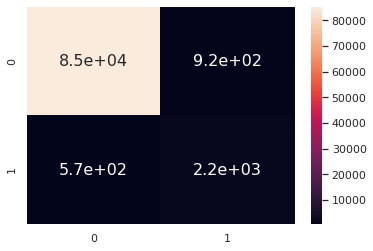

In [ ]:
# resource: https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/

from sklearn.metrics import confusion_matrix
actualLabel = yTest
predictedLabel = (yPred>0.5).astype(int)
cm = metrics.confusion_matrix(actualLabel,predictedLabel)
sns.heatmap(cm, annot=True, annot_kws = {"size": 16})

As we can see from the above Confusion Matrix, the "True Positive" and "True Negative" values are higher than the"False Positive" and "False Negative". This means that the model using the Decision Tree Classifier has predicted more values correctly than wrongly.

### Random Forest

Random forest uses a large number of individual decision trees. Each individual tree in the random forest generates a class prediction and the class with the most votes becomes our model’s prediction.

Here we use the Random Forest Classifier on the dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# njobs:The number of jobs to run in parallel.  njobs = -1 means using all processors``
clfRF = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, class_weight="balanced", verbose = 1)
clfRF.fit(xTrainSM, yTrainSM)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

####Importances

Now we use the Random Forest Classifier to find the feature importances.

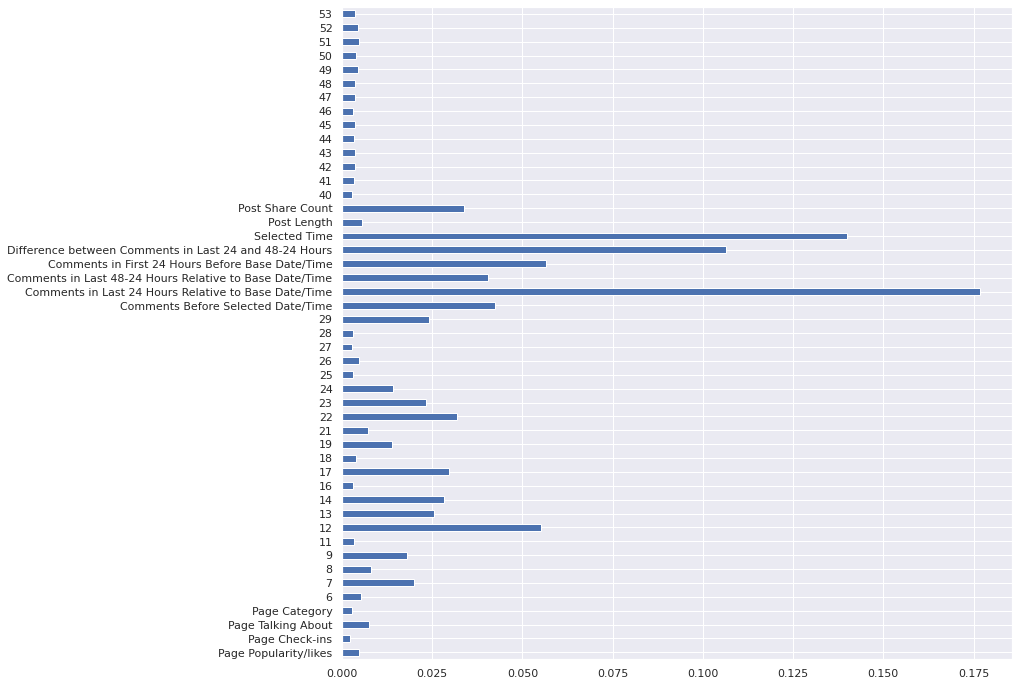

In [ ]:
featImportances = pd.Series(clfRF.feature_importances_, index=cols)
featImportances.plot(kind='barh', figsize=(12,12))
plt.show()

Based on the bar graph shown above, we can see the level of contribution a feature has on the predictions of the model.

####Evaluation

Now we view the accuracy, precision, recall, F1, and AUC of the model from using the Random Forest Classifier. We also plot the precision-recall and AUC-ROC curves.

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Accuracy:  0.9890495356733299


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.2s finished


Precision 0.8048109965635739
Recall 0.8522561863173217
F1 0.8278543655001767
AUC 0.9952540274645426


<Figure size 432x288 with 0 Axes>

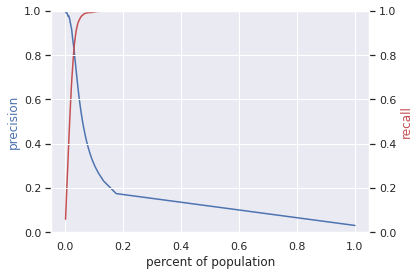

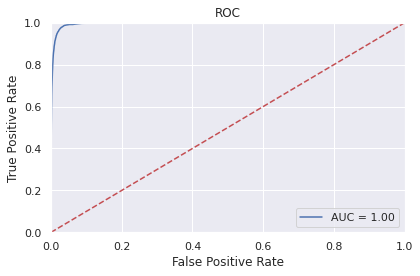

In [ ]:
accuracy = clf_rf.score(xTest, yTest)
print("Accuracy: ", accuracy)
yPred = clf_rf.predict_proba(xTest)[:, 1]
print_metrics(yTest,yPred,10)
plot_PR_curve(yTest, yPred)
plot_ROC_curve(yTest, yPred)

Accuracy, precision, and recall are all fairly high as we can see from the results above. The F1 score is fairly close to 1 and the AUC score is very close to 1 which is great.

The AUC-ROC curve has an AUC score that is very close to 1 which is great.

#### Confusion Matrix

Now we use a Confusion Matrix to see the predictions that the model made based on the observed and predicted class labels from using the Random Forest Classifier. 

The y axis is the predicted value, and x is the actual value. Ex. Top Left = True Negatives, Top Right = False Negatives

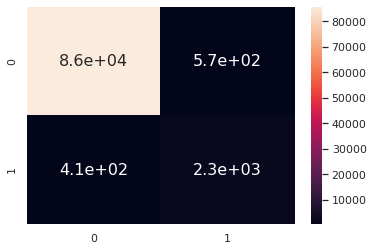

In [ ]:
from sklearn.metrics import confusion_matrix
actualLabel = yTest
predictedLabel = (yPred>0.5).astype(int)
cm = metrics.confusion_matrix(actualLabel,predictedLabel)
sns.heatmap(cm, annot=True, annot_kws = {"size": 16})

As we can see from the above Confusion Matrix, the "True Positive" and "True Negative" values are higher than the"False Positive" and "False Negative". This means that the model using the Random Forest Classifier has predicted more values correctly than wrongly.

### K-Nearest Neighbors

Here we use the K-Nearest Neighbors Classifier on the dataset. KNN works by finding K neighbors of our query and then averaging the labels of each. The value of K is chosen based on the size of the set. For our data set we show the impact and results of different k values later in the report.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clfNN = KNeighborsClassifier(n_neighbors=3)
clfNN.fit(xTrainSM, yTrainSM)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

####Evaluation

Now we view the accuracy, precision, recall, F1, and AUC of the model from using the K-Nearest Neighbors Classifier. We also plot the precision-recall and AUC-ROC curves.

Accuracy:  0.9641467856901941
Precision 0.45493562231759654
Recall 0.8100436681222707
F1 0.5826462504907735
AUC 0.9177392771417272


<Figure size 432x288 with 0 Axes>

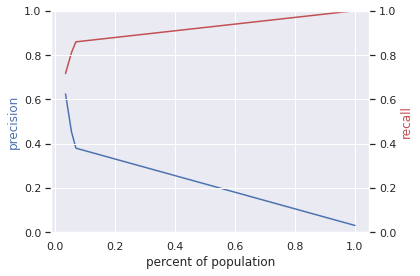

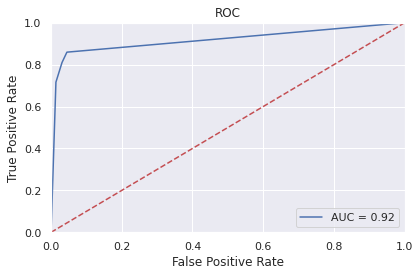

In [ ]:
accuracy = clfNN.score(xTest, yTest)
print("Accuracy: ", accuracy)
yPred = clfNN.predict_proba(xTest)[:, 1]
print_metrics(yTest,yPred,10)
plot_PR_curve(yTest, yPred)
plot_ROC_curve(yTest, yPred)

Accuracy and recall are all fairly high as we can see from the results above. The AUC score is above 0.9 which is good. However, the precision is 0.45 and the F1 score is 0.58 which is low. The low precision number pulled down the F1 score as the recall number is fairly high. This means that there is a significant amount of "False Positives" and "False Negatives."

The AUC-ROC curve has an AUC score that is above 0.9 which is good.

####Confusion Matrix

Now we use a Confusion Matrix to see the predictions that the model made based on the observed and predicted class labels from using the K-Nearest Neighbors Classifier.

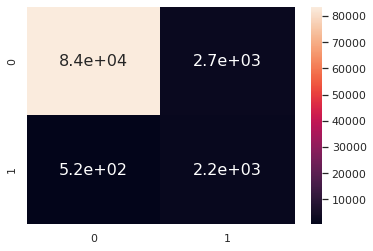

In [ ]:
from sklearn.metrics import confusion_matrix
actualLabel = yTest
predictedLabel = (yPred>0.5).astype(int)
cm = metrics.confusion_matrix(actualLabel,predictedLabel)
sns.heatmap(cm, annot=True, annot_kws = {"size": 16})

As we can see from the above Confusion Matrix, the "True Positive" value is much higher than the"False Positive" and "False Negative", even though the "True Negative" value is lower than the "False Negative" value. This means that the model using the Random Forest Classifier has predicted more values correctly than wrongly.

####Effects of k (number of neighbors)

We want to see how increasing the number of neighbors affects the accuracy of our model. To do this we will plot the accuracy of the model versus the number of neighbors. This takes around 50 minutes to run.

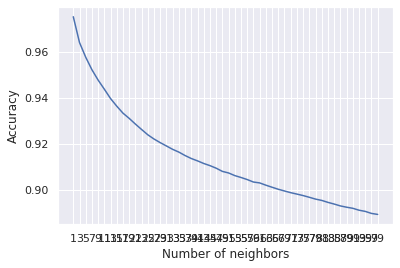

In [ ]:
accuracies = []
kValues = range(1,100,2)
for k in kValues:
    clfNN = KNeighborsClassifier(n_neighbors=k)
    clfNN.fit(xTrainSM, yTrainSM)
    accuracies.append(clfNN.score(xTest, yTest))
plt.plot(kValues, accuracies)
plt.xlabel('Number of neighbors')
plt.xticks(kValues)
plt.ylabel('Accuracy')
plt.show()

From the plot above, we can see that the accuracy is very high when there is a lower number of neighbors and then the accuracy decreases as the number of neighbors increases.

# Conclusions

We initially went into this project with the goal of predicting the exact amount of comments a post has. We very quickly realized that with a dataset consisting of primarily 0s with a range from 0-2000 this would not be very accurate. To better suit our dataset, we adapted to predicting whether or not a post will receive 0-50 comments or more than 50 comments. This allowed us to use binary classification and implement Random Forest, Decision Tree, and K-Nearest Neighbors.

Random Forest had the best results for classifying the data, followed by Decision Tree and then K-Nearest Neighbors. However, the K-Nearest Neighbors classifier may not be useable because of the low precision number and F1 score.

# Resources



*   http://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset?fbclid=IwAR0-0E-gKKpGAe0wRZ2AHboKgntIO3UrAVPaFOnkw6R6IAuAgHVgDzde1qo
*   https://github.com/rutujagurav/Binary-Classification-Predicting-a-pulsar-star/blob/master/PulsarStar_v1.ipynb
*   https://medium.com/@simonprdhm/2-ways-to-upload-csv-files-to-google-colab-4d29ffa9db85
*   https://kite.com/python/answers/how-to-add-a-header-to-a-csv-file-in-python#:~:text=Use%20pandas.,header%20to%20a%20CSV%20file&text=read_csv(file%2C%20header%3DNone,header%20to%20the%20CSV%20file.
*   https://stackoverflow.com/questions/48051100/python-pandas-merge-multiple-csv-files
*   https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
*   https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
*   https://datascience.stackexchange.com/questions/23954/is-there-a-model-agnostic-way-to-determine-feature-importance
*   https://stats.stackexchange.com/questions/321970/imbalanced-data-smote-and-feature-selection#:~:text=1%20Answer&text=This%20paper%20argues%20that%20feature,preferred%2C%20and%20at%20a%20minimum%3A&text=performing%20variable%20selection%20after%20using,that%20the%20samples%20are%20independent.
*   https://towardsdatascience.com/explain-your-machine-learning-with-feature-importance-774cd72abe
*   https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/#:~:text=Accuracy%20%2D%20Accuracy%20is%20the%20most,observation%20to%20the%20total%20observations.&text=80%25%20accurate.,the%20total%20predicted%20positive%20observations.
*   https://en.wikipedia.org/wiki/F1_score
*   https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/



